# Visualizations

This notebook contains the visuals for the most popular trips, rider performance by age, gender, trip duration by user type and the busiest bike in NYC

In [1]:
#import required packages
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#establish connection with the database
db= pymysql.connect(host="localhost",user="",password="",db="citibike")

For the following analysis, I have cleaned up the data in MySQL to remove duplicates, records marked as "Do Not Use", and rows with 0 for latitudes and longitudes

# Most popular trips based on start station and stop station

In this section I have analyzed the most popular trips based on start and stop stations

In [148]:
#query for jan start, end stations and the number of trips
sql1="select start_station_name, end_station_name, count(*) as number_of_trips \
from 2017_jan2 group by start_station_name, end_station_name order by count(*) desc;"
jan_pop_trips=pd.read_sql(sql1, db)#store in a dataframe

#query for feb start, end stations and the number of trips
sql2="select start_station_name, end_station_name, count(*) as number_of_trips \
from 2017_feb2 group by start_station_name, end_station_name order by count(*) desc;"
feb_pop_trips=pd.read_sql(sql2, db)#store in a dataframe

#query for mar start, end stations and the number of trips
sql3="select start_station_name, end_station_name, count(*) as number_of_trips \
from 2017_mar2 group by start_station_name, end_station_name order by count(*) desc;"
mar_pop_trips=pd.read_sql(sql3, db)#store in a dataframe

#query for apr start, end stations and the number of trips
sql4="select start_station_name, end_station_name, count(*) as number_of_trips \
from 2017_apr2 group by start_station_name, end_station_name order by count(*) desc;"
apr_pop_trips=pd.read_sql(sql4, db)#store in a dataframe

#query for may start, end stations and the number of trips
sql5="select start_station_name, end_station_name, count(*) as number_of_trips \
from 2017_may2 group by start_station_name, end_station_name order by count(*) desc;"
may_pop_trips=pd.read_sql(sql5, db)#store in a dataframe

#query for jun start, end stations and the number of trips
sql6="select start_station_name, end_station_name, count(*) as number_of_trips \
from 2017_jun2 group by start_station_name, end_station_name order by count(*) desc;"
jun_pop_trips=pd.read_sql(sql6, db)#store in a dataframe

#query for jul start, end stations and the number of trips
sql7="select start_station_name, end_station_name, count(*) as number_of_trips \
from 2017_jul2 group by start_station_name, end_station_name order by count(*) desc;"
jul_pop_trips=pd.read_sql(sql7, db)#store in a dataframe

#query for aug start, end stations and the number of trips
sql8="select start_station_name, end_station_name, count(*) as number_of_trips \
from 2017_aug2 group by start_station_name, end_station_name order by count(*) desc;"
aug_pop_trips=pd.read_sql(sql8, db)#store in a dataframe

#query for sep start, end stations and the number of trips
sql9="select start_station_name, end_station_name, count(*) as number_of_trips \
from 2017_sep2 group by start_station_name, end_station_name order by count(*) desc;"
sep_pop_trips=pd.read_sql(sql9, db)#store in a dataframe

#query for oct start, end stations and the number of trips
sql10="select start_station_name, end_station_name, count(*) as number_of_trips \
from 2017_oct2 group by start_station_name, end_station_name order by count(*) desc;"
oct_pop_trips=pd.read_sql(sql10, db)#store in a dataframe

#query for nov start, end stations and the number of trips
sql11="select start_station_name, end_station_name, count(*) as number_of_trips \
from 2017_nov2 group by start_station_name, end_station_name order by count(*) desc;"
nov_pop_trips=pd.read_sql(sql11, db)#store in a dataframe

#query for dec start, end stations and the number of trips
sql12="select start_station_name, end_station_name, count(*) as number_of_trips \
from 2017_dec2 group by start_station_name, end_station_name order by count(*) desc;"
dec_pop_trips=pd.read_sql(sql12, db)#store in a dataframe


In [149]:
#concatenate all months popular trips into a sincgle dataframe
months_pop_trips=pd.concat([jan_pop_trips,feb_pop_trips,mar_pop_trips,apr_pop_trips,may_pop_trips,jun_pop_trips,\
                          jul_pop_trips,aug_pop_trips,sep_pop_trips,oct_pop_trips,nov_pop_trips,dec_pop_trips],ignore_index=True)
months_pop_trips.head()#check the first few rows

,start_station_name,end_station_name,number_of_trips
0,E 7 St & Avenue A,Cooper Square & E 7 St,440
1,W 21 St & 6 Ave,9 Ave & W 22 St,367
2,E 33 St & 2 Ave,W 33 St & 7 Ave,318
3,Pershing Square North,E 24 St & Park Ave S,305
4,N 6 St & Bedford Ave,Wythe Ave & Metropolitan Ave,295


In [151]:
#groupby the start stations across months and sum the number of trips
months_pop_trips1=months_pop_trips.groupby(['start_station_name','end_station_name']).sum()
months_pop_trips1.reset_index(inplace=True)#reset index
pop_trips=(months_pop_trips1.sort_values(by='number_of_trips',ascending=False)).head(5) #top 5 most popular trips
pop_trips#dataframe with the most popular trips

,start_station_name,end_station_name,number_of_trips
219323,Pershing Square North,Pershing Square North,16129
296067,West St & Chambers St,West St & Chambers St,14884
108950,E 17 St & Broadway,E 17 St & Broadway,12736
7186,12 Ave & W 40 St,12 Ave & W 40 St,11848
53756,Broadway & E 22 St,Broadway & E 22 St,11522


In [154]:
#create new column merging the start and stop stations
pop_trips['Trip'] = pop_trips['start_station_name'] + ' to '+ pop_trips['end_station_name']
pop_trips

,start_station_name,end_station_name,number_of_trips,Trip
219323,Pershing Square North,Pershing Square North,16129,Pershing Square North to Pershing Square North
296067,West St & Chambers St,West St & Chambers St,14884,West St & Chambers St to West St & Chambers St
108950,E 17 St & Broadway,E 17 St & Broadway,12736,E 17 St & Broadway to E 17 St & Broadway
7186,12 Ave & W 40 St,12 Ave & W 40 St,11848,12 Ave & W 40 St to 12 Ave & W 40 St
53756,Broadway & E 22 St,Broadway & E 22 St,11522,Broadway & E 22 St to Broadway & E 22 St


Text(0,0.5,'Number of Trips')

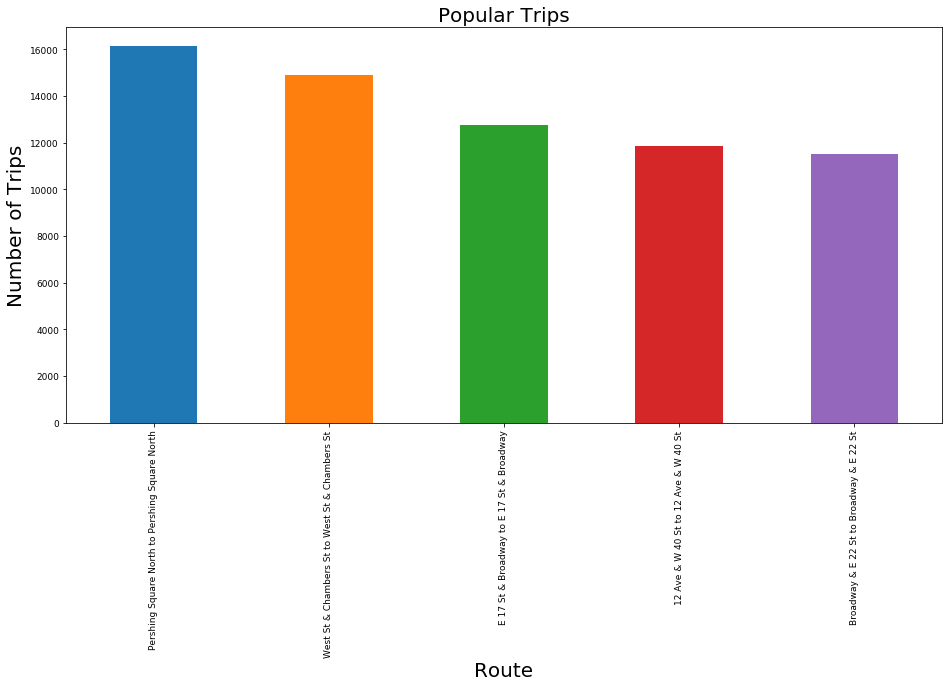

In [162]:
#plot most popular trips based on start and stop stations and the total number 
# figure size in inches
rcParams['figure.figsize'] = 15.7,7.27
p=pop_trips.plot( kind= 'bar', x='Trip',y='number_of_trips',legend=False)#plot
p.set_title('Popular Trips',fontsize=20)
p.set_xlabel("Route",fontsize=20)
p.set_ylabel("Number of Trips",fontsize=20)

# Rider Performance by Gender, Age based on trip duration and speed

In this section, I have analyzed the users performance based on average trip distance and median speed, by gender and age

In [4]:
#get data for jan and store it in a dataframe
sql37="SELECT tripduration, start_station_name, end_station_name, gender, birthyear,\
(3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance from 2017_jan2;"
jan_rider_perf=pd.read_sql(sql37,db) #store data in the dataframe

#get data for feb and store it in a dataframe
sql38="SELECT tripduration, start_station_name, end_station_name, gender, birthyear,\
(3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance from 2017_feb2;"
feb_rider_perf=pd.read_sql(sql38,db)#store data in the dataframe

#get data for mar and store it in a dataframe
sql39="SELECT tripduration, start_station_name, end_station_name, gender, birthyear,\
(3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance from 2017_mar2;"
mar_rider_perf=pd.read_sql(sql39,db)#store data in the dataframe

#get data for mar and store it in a dataframe
sql40="SELECT tripduration, start_station_name, end_station_name, gender, birth_year,\
(3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance from 2017_apr2;"
apr_rider_perf=pd.read_sql(sql40,db)#store data in the dataframe

#get data for may and store it in a dataframe
sql41="SELECT tripduration, start_station_name, end_station_name, gender, birth_year,\
(3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance from 2017_may2;"
may_rider_perf=pd.read_sql(sql41,db)#store data in the dataframe

#get data for jun and store it in a dataframe
sql42="SELECT tripduration, start_station_name, end_station_name, gender, birth_year,\
(3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance from 2017_jun2;"
jun_rider_perf=pd.read_sql(sql42,db)#store data in the dataframe

#get data for jul and store it in a dataframe
sql43="SELECT tripduration, start_station_name, end_station_name, gender, birth_year,\
(3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance from 2017_jul2;"
jul_rider_perf=pd.read_sql(sql43,db)#store data in the dataframe

#get data for aug and store it in a dataframe
sql44="SELECT tripduration, start_station_name, end_station_name, gender, birth_year,\
(3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance from 2017_aug2;"
aug_rider_perf=pd.read_sql(sql44,db)#store data in the dataframe

#get data for sep and store it in a dataframe
sql45="SELECT tripduration, start_station_name, end_station_name, gender, birth_year,\
(3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance from 2017_sep2;"
sep_rider_perf=pd.read_sql(sql45,db)#store data in the dataframe

#get data for oct and store it in a dataframe
sql46="SELECT tripduration, start_station_name, end_station_name, gender, birth_year,\
(3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance from 2017_oct2;"
oct_rider_perf=pd.read_sql(sql46,db)#store data in the dataframe

#get data for nov and store it in a dataframe
sql47="SELECT tripduration, start_station_name, end_station_name, gender, birth_year,\
(3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance from 2017_nov2;"
nov_rider_perf=pd.read_sql(sql47,db)#store data in the dataframe

#get data for dec and store it in a dataframe
sql48="SELECT tripduration, start_station_name, end_station_name, gender, birth_year,\
(3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance from 2017_dec2;"
dec_rider_perf=pd.read_sql(sql48,db)#store data in the dataframe

In [16]:
#rename jan, feb, marc birthyear to birth_year
jan_rider_perf.rename(columns={'birthyear': 'birth_year'}, inplace=True)
feb_rider_perf.rename(columns={'birthyear': 'birth_year'}, inplace=True)
mar_rider_perf.rename(columns={'birthyear': 'birth_year'}, inplace=True)

In [17]:
#concatenate all dataframes into a single dataframe
rider_months=pd.concat([jan_rider_perf,feb_rider_perf,mar_rider_perf,apr_rider_perf,may_rider_perf,\
                       jun_rider_perf,jul_rider_perf,aug_rider_perf,sep_rider_perf,oct_rider_perf,\
                       nov_rider_perf,dec_rider_perf],ignore_index=True)

In [18]:
#first few rows
rider_months.head()

,tripduration,start_station_name,end_station_name,gender,birth_year,distance
0,680,W 82 St & Central Park West,Central Park West & W 72 St,2,1965,0.543187
1,1282,Cooper Square & E 7 St,Broadway & W 32 St,2,1987,1.342357
2,648,5 Ave & E 78 St,3 Ave & E 71 St,0,,0.576545
3,631,5 Ave & E 78 St,3 Ave & E 71 St,0,,0.576545
4,621,5 Ave & E 78 St,3 Ave & E 71 St,0,,0.576545


In [19]:
#replace missing birth year with 0
rider_months.replace(to_replace='',value=0,inplace=True)

In [20]:
#first few rows
rider_months.head()

,tripduration,start_station_name,end_station_name,gender,birth_year,distance
0,680,W 82 St & Central Park West,Central Park West & W 72 St,2,1965,0.543187
1,1282,Cooper Square & E 7 St,Broadway & W 32 St,2,1987,1.342357
2,648,5 Ave & E 78 St,3 Ave & E 71 St,0,0,0.576545
3,631,5 Ave & E 78 St,3 Ave & E 71 St,0,0,0.576545
4,621,5 Ave & E 78 St,3 Ave & E 71 St,0,0,0.576545


In [21]:
#summary of the dataframe
rider_months.describe(include='all')

,tripduration,start_station_name,end_station_name,gender,birth_year,distance
count,1.578586e+07,15785859,15785859,1.578586e+07,15785859,1.578586e+07
unique,NaN,820,841,NaN,107,NaN
top,NaN,Pershing Square North,Pershing Square North,NaN,NULL,NaN
freq,NaN,159598,157488,NaN,1357722,NaN
mean,9.773416e+02,NaN,NaN,1.129113e+00,NaN,1.153332e+00
std,1.638785e+04,NaN,NaN,5.571554e-01,NaN,8.716689e-01
min,6.100000e+01,NaN,NaN,0.000000e+00,NaN,0.000000e+00
25%,3.720000e+02,NaN,NaN,1.000000e+00,NaN,5.518692e-01
50%,6.170000e+02,NaN,NaN,1.000000e+00,NaN,8.942758e-01
75%,1.061000e+03,NaN,NaN,1.000000e+00,NaN,1.480817e+00


In [34]:
#counts by gender
rider_months['gender'].value_counts()

1    10622427
2     3600795
0     1562637
Name: gender, dtype: int64

In [24]:
#create  'speed' variable
rider_months['speed_mph']=(rider_months['distance']/(rider_months['tripduration']/3600))

In [ ]:
#check row with max speed
rider_months.ix[rider_months['speed_mph'].idxmax()]

In [39]:
#check extreme values for speed
rider_months['speed_mph'].quantile(0.99999)

15.029685090018752

In [26]:
#number of rows with speed >15 mph- 99.999th percentile
len(rider_months[rider_months['speed_mph']>15]) #seem like incorrect data, covered over 2 miles in less than a minute

166

In [27]:
#exclude rows with speed>15 because average speed within city limits cannot be >15 mph
rider_months2=rider_months[rider_months['speed_mph']<=15]

In [28]:
#summary of the dataframe
rider_months2.describe(include='all')

,tripduration,start_station_name,end_station_name,gender,birth_year,distance,speed_mph
count,1.578569e+07,15785693,15785693,1.578569e+07,15785693,1.578569e+07,1.578569e+07
unique,NaN,819,840,NaN,107,NaN,NaN
top,NaN,Pershing Square North,Pershing Square North,NaN,NULL,NaN,NaN
freq,NaN,159596,157488,NaN,1357715,NaN,NaN
mean,9.773486e+02,NaN,NaN,1.129114e+00,NaN,1.153322e+00,5.649912e+00
std,1.638794e+04,NaN,NaN,5.571568e-01,NaN,8.716413e-01,1.910771e+00
min,6.100000e+01,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,3.720000e+02,NaN,NaN,1.000000e+00,NaN,5.518692e-01,4.525252e+00
50%,6.170000e+02,NaN,NaN,1.000000e+00,NaN,8.942758e-01,5.703544e+00
75%,1.061000e+03,NaN,NaN,1.000000e+00,NaN,1.480817e+00,6.870970e+00


# Gender wise performance- mean distance, median speed and mean speed

In [29]:
#create dataframe with gender, time, distance and speed 
gen_perf=rider_months2[['gender','tripduration','distance','speed_mph']]

In [30]:
#check first few rows
gen_perf.head()

,gender,tripduration,distance,speed_mph
0,2,680,0.543187,2.875694
1,2,1282,1.342357,3.769489
2,0,648,0.576545,3.203029
3,0,631,0.576545,3.289323
4,0,621,0.576545,3.342292


In [31]:
#summary of the gender performance dataframe
gen_perf.describe(include='all')

,gender,tripduration,distance,speed_mph
count,1.578569e+07,1.578569e+07,1.578569e+07,1.578569e+07
mean,1.129114e+00,9.773486e+02,1.153322e+00,5.649912e+00
std,5.571568e-01,1.638794e+04,8.716413e-01,1.910771e+00
min,0.000000e+00,6.100000e+01,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.720000e+02,5.518692e-01,4.525252e+00
50%,1.000000e+00,6.170000e+02,8.942758e-01,5.703544e+00
75%,1.000000e+00,1.061000e+03,1.480817e+00,6.870970e+00
max,2.000000e+00,9.735948e+06,1.093099e+01,1.499790e+01


In [ ]:
#convert gender to string
gen_perf['gender']=gen_perf['gender'].apply(str)

#replace 0,1,2 with corresponding gender values: 0- Unknown, 1-Male and 2-Female
gen_perf.loc[gen_perf.gender == '0','gender'] = 'Unknown'
gen_perf.loc[gen_perf.gender == '1','gender'] = 'Male'
gen_perf.loc[gen_perf.gender == '2','gender'] = 'Female'

Text(0.5,1,'Gender wise distance')

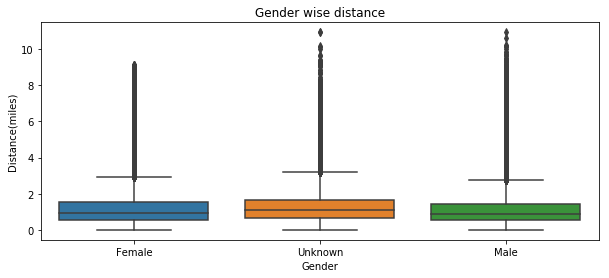

In [45]:
#box plot of gender and distance
fig = plt.figure(figsize=(10,4)) #set figure size
bp1=sns.boxplot(x="gender", y="distance", data=gen_perf); #generate box plot
bp1.set(xlabel='Gender', ylabel='Distance(miles)') #add labels
bp1.set_title('Gender wise distance') #add title

Text(0.5,1,'Gender wise speed')

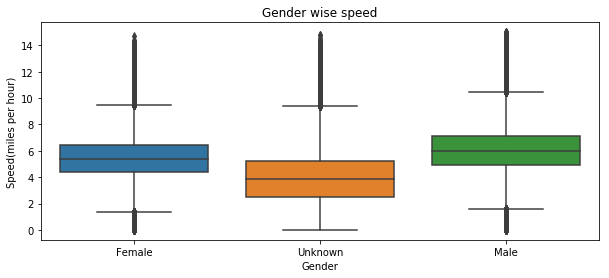

In [46]:
#box plot of gender and speed
fig = plt.figure(figsize=(10,4)) #set margins
bp2=sns.boxplot(x="gender", y="speed_mph", data=gen_perf); #plot
bp2.set(xlabel='Gender', ylabel='Speed(miles per hour)') #set axes labels
bp2.set_title('Gender wise speed') #add title

# Gender wise mean distance and mean speed

In [34]:
#create a new dataframe with mean vales for trip duration, distance and speed
gen_perf_mean=gen_perf.groupby('gender').aggregate('mean') #get means
gen_perf_mean.reset_index(inplace=True)#reset index
gen_perf_mean#check the dataframe

,gender,tripduration,distance,speed_mph
0,Female,996.190887,1.181214,5.389926
1,Male,844.185510,1.125641,5.987812
2,Unknown,1839.133387,1.277220,3.952057


In [37]:
#dataframe to plot gender wise mean speed and mean distance
gen_perf_mean1=gen_perf_mean[['gender','distance','speed_mph']]

Text(0.5,0,'Gender')

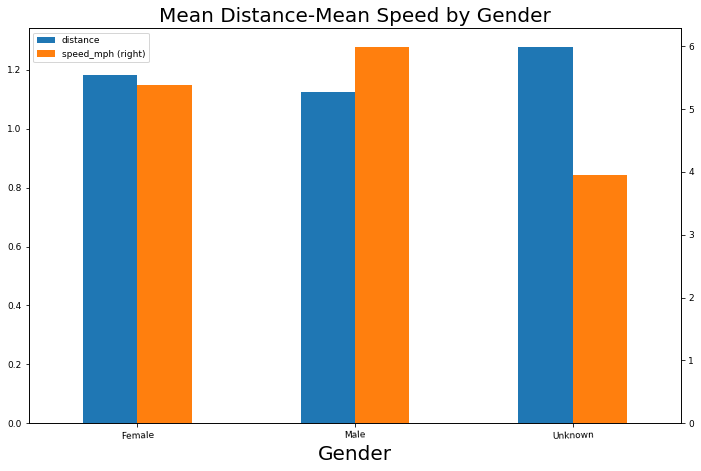

In [163]:
#plot gender wise mean distance and mean speed
# figure size in inches
rcParams['figure.figsize'] = 11.7,7.27
g=gen_perf_mean1.plot( kind= 'bar' , secondary_y= 'speed_mph' ,rot=2, x='gender',legend=True)#plot
g.set_title('Mean Distance-Mean Speed by Gender',fontsize=20)
g.set_xlabel('Gender',fontsize=20)

Mean distance travelled is almost the same for all genders. It ranges between 1.18 to 1.2 miles. Mean speed is the highest for males.

# Gender wise mean distance and median speed

In [92]:
#create dataframe with gender and distance
gen_perf_gen_dist=gen_perf[['gender','distance']]

#create dataframe with gender and speed
gen_perf_gen_speed=gen_perf[['gender','speed_mph']]

#group gender by mean distance
gen_perf_gen_dist1=gen_perf_gen_dist.groupby('gender').mean()
gen_perf_gen_dist1.reset_index(inplace=True)#reset index

#group gender by median speed
gen_perf_gen_speed1=gen_perf_gen_speed.groupby('gender').median()
gen_perf_gen_speed1.reset_index(inplace=True)#reset index

#join mean distance and median speed dataframes
gen_perf_gen_dist_med_speed=pd.concat([gen_perf_gen_dist1,gen_perf_gen_speed1['speed_mph']],axis=1) 
gen_perf_gen_dist_med_speed.columns=['gender','mean_dist','median_speed'] #rename columns
gen_perf_gen_dist_med_speed #check the dataframe

,gender,mean_dist,median_speed
0,Female,1.181214,5.392012
1,Male,1.125641,6.005873
2,Unknown,1.277220,3.852279


Text(0.5,0,'Gender')

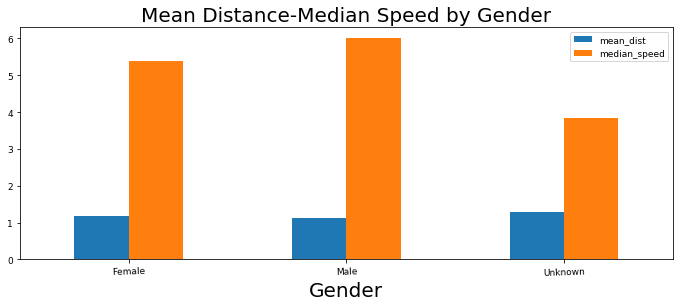

In [165]:
#plot gender wise mean distance and median speed
# figure size in inches
rcParams['figure.figsize'] = 11.7,4.27
g1=gen_perf_gen_dist_med_speed.plot( kind= 'bar' , secondary_y= 'speed_mph' ,rot=2, x='gender',legend=True)
g1.set_title('Mean Distance-Median Speed by Gender',fontsize=20)
g1.set_xlabel('Gender',fontsize=20)

Mean distance travelled is almost the same for all genders. Median speed is the highest for males.

# Age wise performance- mean distance, mean speed, median speed

In [47]:
#first few rows of rider dataframe
rider_months2.head()

,tripduration,start_station_name,end_station_name,gender,birth_year,distance,speed_mph
0,680,W 82 St & Central Park West,Central Park West & W 72 St,2,1965,0.543187,2.875694
1,1282,Cooper Square & E 7 St,Broadway & W 32 St,2,1987,1.342357,3.769489
2,648,5 Ave & E 78 St,3 Ave & E 71 St,0,0,0.576545,3.203029
3,631,5 Ave & E 78 St,3 Ave & E 71 St,0,0,0.576545,3.289323
4,621,5 Ave & E 78 St,3 Ave & E 71 St,0,0,0.576545,3.342292


In [48]:
#create a dataframe for age-wise performance measure
age_perf=rider_months2[['birth_year','distance','speed_mph']]

In [ ]:
#replace NULLs with 0 in 'birth_year
age_perf['birth_year'].replace(to_replace="NULL",value='0',inplace=True)

#convert birth_year to int
age_perf['birth_year']=age_perf['birth_year'].astype(int)

#create 'age' variable
age_perf['age']=2018-(age_perf['birth_year'])

In [52]:
#first few rows of age-wise performance dataframe
age_perf.head()

,birth_year,distance,speed_mph,age
0,1965,0.543187,2.875694,53
1,1987,1.342357,3.769489,31
2,0,0.576545,3.203029,2018
3,0,0.576545,3.289323,2018
4,0,0.576545,3.342292,2018


In [ ]:
# create age groups

#create age group bins
l1=list(range(0, 21)) #list of ages between 0-20
l2=list(range(21, 41))#list of ages between 21-40
l3=list(range(41, 61))#list of ages between 41-60
l4=list(range(61, 150))#list of ages >60

age_perf['Age Group'] = 'Unknown'#mark missing ages
age_perf.loc[age_perf['age'].isin(l1) , 'Age Group'] = '0-20'#mark age group 0-20
age_perf.loc[age_perf['age'].isin(l2) , 'Age Group'] = '21-40'#mark age group 21-40
age_perf.loc[age_perf['age'].isin(l3) , 'Age Group'] = '41-60'#mark age group 41-60
age_perf.loc[age_perf['age'].isin(l4) , 'Age Group'] = 'Above 61'#mark age group >61

In [56]:
#first few rows of the age wise performance dataframe
age_perf.head()

,birth_year,distance,speed_mph,age,Age Group
0,1965,0.543187,2.875694,53,41-60
1,1987,1.342357,3.769489,31,21-40
2,0,0.576545,3.203029,2018,Unknown
3,0,0.576545,3.289323,2018,Unknown
4,0,0.576545,3.342292,2018,Unknown


Text(0.5,1,'Age wise distance')

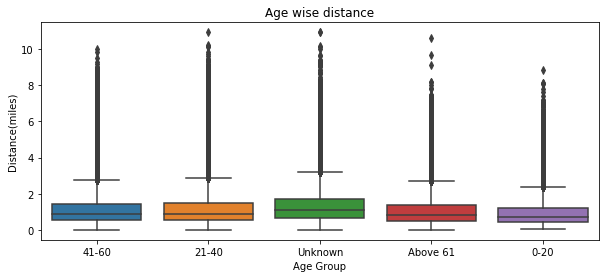

In [57]:
#age group vs distance
fig = plt.figure(figsize=(10,4)) #set margins
bp3=sns.boxplot(x='Age Group',y='distance',data=age_perf) #plot
bp3.set(xlabel='Age Group', ylabel='Distance(miles)') #set axes labels
bp3.set_title("Age wise distance") #set title

Text(0.5,1,'Age wise speed')

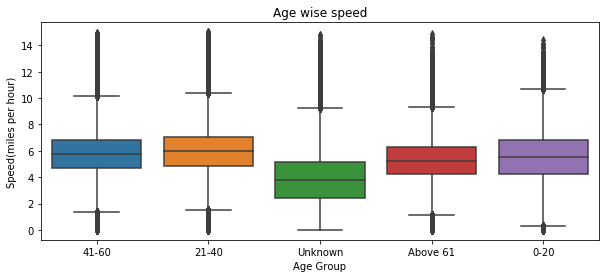

In [58]:
#age group vs speed
fig = plt.figure(figsize=(10,4))#set margins
bp4=sns.boxplot(x='Age Group',y='speed_mph',data=age_perf)#plot
bp4.set(xlabel='Age Group', ylabel='Speed(miles per hour)')#set axes labels
bp4.set_title("Age wise speed")#set title

# Age wise mean distance and mean speed

In [71]:
#age wise performance daatframe with mean values for speed and distance
age_perf_mean1=age_perf_mean[['Age Group','distance','speed_mph']]#select columns needed for the graph
age_perf_mean2=age_perf_mean1.groupby('Age Group').aggregate('mean') # calculate mean distance and speed for age groups
age_perf_mean2.reset_index(inplace=True)#reset index
age_perf_mean2#check the dataframe

,Age Group,distance,speed_mph
0,0-20,0.955864,5.443706
1,21-40,1.152396,5.948318
2,41-60,1.131682,5.737587
3,Above 61,1.077429,5.242511
4,Unknown,1.284414,3.888172


Text(0.5,0,'Age Groups')

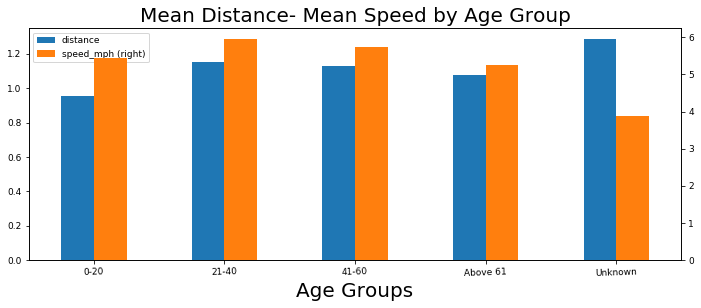

In [166]:
#plot age wise mean distance and mean speed
# figure size in inches
rcParams['figure.figsize'] = 11.7,4.27
a=age_perf_mean2.plot( kind= 'bar' , secondary_y= 'speed_mph' ,rot=2, x='Age Group',legend=True) #plot 
a.set_title('Mean Distance- Mean Speed by Age Group',fontsize=20)#set title
a.set_xlabel('Age Groups',fontsize=20)

Mean distance travelled is almost the same for all age groups. It ranges between 0.9 to 1.28 miles. Mean speed is the highest for ages 21-40 and 41-60 years.

# Age wise mean distance and median speed

In [98]:
#create dataframe with age groups and distance
age_perf_age_dist=age_perf[['Age Group','distance']]

#create dataframe with age group and speed
age_perf_age_speed=age_perf[['Age Group','speed_mph']]

In [104]:
#group age group by mean distance
age_perf_mean_dist1=age_perf_age_dist.groupby('Age Group').mean()
age_perf_mean_dist1.reset_index(inplace=True)#reset index

#group age group by median speed
age_perf_age_speed1=age_perf_age_speed.groupby('Age Group').median()
age_perf_age_speed1.reset_index(inplace=True)#reset index

#join mean distance and median speed dataframes
age_perf_age_dist_med_speed=pd.concat([age_perf_mean_dist1,age_perf_age_speed1['speed_mph']],axis=1) 
age_perf_age_dist_med_speed.columns=['Age Group','mean_dist','median_speed'] #rename columns
age_perf_age_dist_med_speed #check the dataframe

,Age Group,mean_dist,median_speed
0,0-20,0.955864,5.537415
1,21-40,1.152396,5.955933
2,41-60,1.131682,5.744552
3,Above 61,1.077429,5.240677
4,Unknown,1.284414,3.782160


Text(0.5,0,'Age Groups')

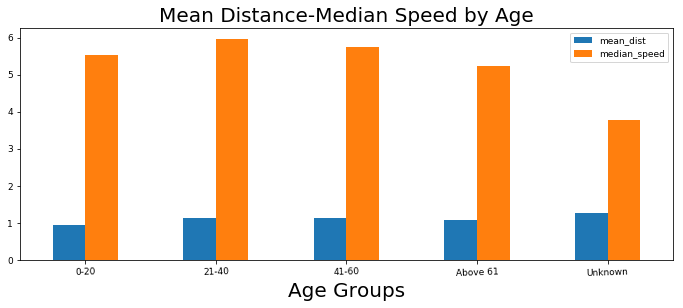

In [167]:
#plot age wise mean distance and median speed
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,4.27
a2=age_perf_age_dist_med_speed.plot( kind= 'bar' , secondary_y= 'speed_mph' ,rot=2, x='Age Group',legend=True) #plot grpah
a2.set_title('Mean Distance-Median Speed by Age',fontsize=20) #set title
a2.set_xlabel('Age Groups',fontsize=20)

Mean distance travelled is almost the same for all age groups. Median speed is the highest for ages 21-40 and 41-60 years.

# Trip duration by user type

In this section I have analyzed the trip duration by the user type

In [107]:
# query jan data for trip duration and usertype
sql13="select usertype, sum(tripduration) from 2017_jan2 group by usertype;"
jan_users=pd.read_sql(sql13,db) #store data in the dataframe

#query feb data for trip duration and usertype
sql14="select usertype, sum(tripduration) from 2017_feb2 group by usertype;"
feb_users=pd.read_sql(sql14,db)#store data in the dataframe

#query mar data for trip duration and usertype
sql15="select usertype, sum(tripduration) from 2017_mar2 group by usertype;"
mar_users=pd.read_sql(sql15,db)#store data in the dataframe

#query apr data for trip duration and usertype
sql16="select usertype, sum(tripduration) from 2017_apr2 group by usertype;"
apr_users=pd.read_sql(sql16,db)#store data in the dataframe

#query may data for trip duration and usertype
sql17="select usertype, sum(tripduration) from 2017_may2 group by usertype;"
may_users=pd.read_sql(sql17,db)#store data in the dataframe

#query jun data for trip duration and usertype
sql18="select usertype, sum(tripduration) from 2017_jun2 group by usertype;"
jun_users=pd.read_sql(sql18,db)#store data in the dataframe

#query jul data for trip duration and usertype
sql19="select usertype, sum(tripduration) from 2017_jul2 group by usertype;"
jul_users=pd.read_sql(sql19,db)#store data in the dataframe

#query aug data for trip duration and usertype
sql20="select usertype, sum(tripduration) from 2017_aug2 group by usertype;"
aug_users=pd.read_sql(sql20,db) #store data in the dataframe

#query sep data for trip duration and usertype
sql21="select usertype, sum(tripduration) from 2017_sep2 group by usertype;"
sep_users=pd.read_sql(sql21,db)#store data in the dataframe

#query oct data for trip duration and usertype
sql22="select usertype, sum(tripduration) from 2017_oct2 group by usertype;"
oct_users=pd.read_sql(sql22,db)#store data in the dataframe

#query nov data for trip duration and usertype
sql23="select usertype, sum(tripduration) from 2017_nov2 group by usertype;"
nov_users=pd.read_sql(sql23,db)#store data in the dataframe

#query dec data for trip duration and usertype
sql24="select usertype, sum(tripduration) from 2017_dec2 group by usertype;"
dec_users=pd.read_sql(sql24,db)#store data in the dataframe

In [109]:
#concatenate all months. Jan-Mar had some missing values for the user types-replaced those with 'Not Known'
user_dur=pd.concat([jan_users,feb_users,mar_users,apr_users,may_users,jun_users,jul_users,aug_users,\
                   sep_users,oct_users,nov_users,dec_users],ignore_index=True) #concatenate all months user- trip duration
user_dur.replace(to_replace='',value='Not Known',inplace=True) #replace missing user values with not known
user_dur.head()#check first few rows of the user trip duration dataframe

,usertype,sum(tripduration)
0,Not Known,4238819.0
1,Customer,54328749.0
2,Subscriber,491761665.0
3,Not Known,10291688.0
4,Customer,76623751.0


In [110]:
#group by user type
user_dur2=user_dur.groupby('usertype').mean() #get the mean of trip duration by user type
user_dur2.reset_index(inplace=True) #replace index
user_dur2.head()#data frame

,usertype,sum(tripduration)
0,Customer,3.378921e+08
1,Not Known,7.393136e+06
2,Subscriber,9.459410e+08


In [111]:
#create a column to represent trip duration in hours
user_dur2['Trip duration(hours)']=round(user_dur2['sum(tripduration)']/3600) #calculate trip duration in hours
user_dur2.columns=['User Type','Mean Trip Duration (seconds)', 'Mean Trip Duration(hours)'] #rename columns
#calculate percentage of total duration for each user type
user_dur2['%Duration(hours)']=round((user_dur2['Mean Trip Duration(hours)']/sum(user_dur2['Mean Trip Duration(hours)']))*100)

In [112]:
user_dur2#show the dataframe with mean trip duration in seconds, hours and percentage

,User Type,Mean Trip Duration (seconds),Mean Trip Duration(hours),%Duration(hours)
0,Customer,3.378921e+08,93859.0,26.0
1,Not Known,7.393136e+06,2054.0,1.0
2,Subscriber,9.459410e+08,262761.0,73.0


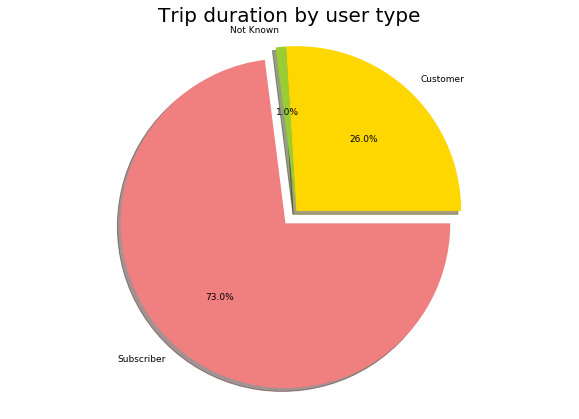

In [116]:
#plot trip duration based on user type
labels = user_dur2['User Type'] #labels
sizes = user_dur2['%Duration(hours)']#size of each slice
colors = ['gold', 'yellowgreen', 'lightcoral'] #colors to be used
explode = (0, 0, 0.1)  # explode 3rd slice
# Plot pie chart
fig = plt.figure(figsize=(10,7))#set margins
plt.rcParams['font.size'] = 9.0 #font size of the labels
plt.pie(sizes,explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0) #plot pie chart
 
plt.axis('equal')
plt.title("Trip duration by user type",fontsize=20)
plt.show()

Subscribers have used the bike the most. They have contributed to 73% of the total travel time which is 262761 hours

# Which is the busiest bike in NYC in 2017? How many times was it used? How many minutes was it in use?

In this section, I have identified the most frequently used bikes in NYC based on the number of uses and the minutes of usage

In [117]:
#query jan bike data for number of uses and trip duration
sql25="select bikeid, sum(tripduration), count(*) as num_times_used from 2017_jan2 group by bikeid"
jan_bike=pd.read_sql(sql25,db)#store values in a dataframe

#query feb bike data for number of uses and trip duration
sql26="select bikeid, sum(tripduration), count(*) as num_times_used from 2017_feb2 group by bikeid"
feb_bike=pd.read_sql(sql26,db)#store values in a dataframe

#query mar bike data for number of uses and trip duration
sql27="select bikeid, sum(tripduration), count(*) as num_times_used from 2017_mar2 group by bikeid"
mar_bike=pd.read_sql(sql27,db)#store values in a dataframe

#query apr bike data for number of uses and trip duration
sql28="select bikeid, sum(tripduration), count(*) as num_times_used from 2017_apr2 group by bikeid"
apr_bike=pd.read_sql(sql28,db)#store values in a dataframe

#query may bike data for number of uses and trip duration
sql29="select bikeid, sum(tripduration), count(*) as num_times_used from 2017_may2 group by bikeid"
may_bike=pd.read_sql(sql29,db)#store values in a dataframe

#query jun bike data for number of uses and trip duration
sql30="select bikeid, sum(tripduration), count(*) as num_times_used from 2017_jun2 group by bikeid"
jun_bike=pd.read_sql(sql30,db)#store values in a dataframe

#query jul bike data for number of uses and trip duration
sql31="select bikeid, sum(tripduration), count(*) as num_times_used from 2017_jul2 group by bikeid"
jul_bike=pd.read_sql(sql31,db)#store values in a dataframe

#query aug bike data for number of uses and trip duration
sql32="select bikeid, sum(tripduration), count(*) as num_times_used from 2017_aug2 group by bikeid"
aug_bike=pd.read_sql(sql32,db)#store values in a dataframe

#query sep bike data for number of uses and trip duration
sql33="select bikeid, sum(tripduration), count(*) as num_times_used from 2017_sep2 group by bikeid"
sep_bike=pd.read_sql(sql33,db)#store values in a dataframe

#query oct bike data for number of uses and trip duration
sql34="select bikeid, sum(tripduration), count(*) as num_times_used from 2017_oct2 group by bikeid"
oct_bike=pd.read_sql(sql34,db)#store values in a dataframe

#query nov bike data for number of uses and trip duration
sql35="select bikeid, sum(tripduration), count(*) as num_times_used from 2017_nov2 group by bikeid"
nov_bike=pd.read_sql(sql35,db)#store values in a dataframe

#query dec bike data for number of uses and trip duration
sql36="select bikeid, sum(tripduration), count(*) as num_times_used from 2017_dec2 group by bikeid"
dec_bike=pd.read_sql(sql36,db)#store values in a dataframe

In [118]:
#concatenate all the months bikes data
bike_months=pd.concat([jan_bike,feb_bike,mar_bike,apr_bike,may_bike,jun_bike,jul_bike,aug_bike,sep_bike,\
                      oct_bike,nov_bike,dec_bike],ignore_index=True)

In [124]:
bike_months.head() #first few rows of the daat frame of all months

,bikeid,sum(tripduration),num_times_used
0,14529,60646.0,96
1,14530,33635.0,54
2,14531,69781.0,95
3,14532,38932.0,57
4,14533,60797.0,93


In [130]:
#groupby bike id and find mean of number of times used and mean of trip duration and sort by number of times used
bike_months2=bike_months.groupby('bikeid').aggregate('sum') #mean of trip duration and num of time used
bike_months3=bike_months2.sort_values(by='num_times_used',ascending=False) #sort num of times used by descending order
bike_months3.reset_index(inplace=True)#rest index
bike_months3.head(5) #first 5 rows of the dataframe containing bike id, number of times used and total tripduration

,bikeid,sum(tripduration),num_times_used
0,25738,2388512.0,2445
1,25275,1996645.0,2358
2,26565,2002699.0,2291
3,27161,1865761.0,2276
4,27117,1780110.0,2264


In [ ]:
#calculate number of minutes of use
bike_months3['Trip Duration (minutes)']=round(bike_months3['sum(tripduration)']/60) #conver trip duration to minutes
bike_months3.columns=['Bike_Id','Trip_Duration_s','Number_of_times_used','Trip_Duration_minutes'] #rename columns
bike_months3['Number_of_times_used']=round(bike_months3['Number_of_times_used']) #round the value of number of times used 
bike_months4=bike_months3.head(4) #retain top 4 bikes
bike_months4.drop(['Trip_Duration_s'],axis=1,inplace=True) #drop trip duration in seconds

In [132]:
#check dataframe of the most frequently used bikes with the number of times they were used and the 
#trip duration in minutes
bike_months4 

,Bike_Id,Number_of_times_used,Trip_Duration_minutes
0,25738,2445,39809.0
1,25275,2358,33277.0
2,26565,2291,33378.0
3,27161,2276,31096.0


Text(0.5,0,'Bike Id')

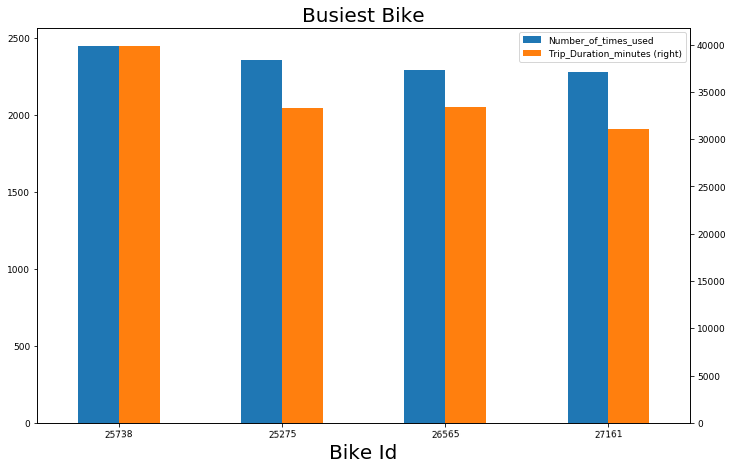

In [168]:
#plot the most frequently used bikes along with the number of times they were used and trip duration in minutes
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,7.27
b=bike_months4.plot( kind= 'bar' , secondary_y= 'Trip_Duration_minutes' ,rot=2, x='Bike_Id',legend=True)#plot
b.set_title('Busiest Bike',fontsize=20)#set title
b.set_xlabel('Bike Id',fontsize=20)

The busiest bike was the bike "25738". It was used 2445 times for 39809 minutes.